In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#generate
def generate():
    mean1 = [3, 2]
    cov1 = [[0.4, 0], [0, 0.4]]
    mean2 = [5,0]
    cov2 = [[0.6, 0], [0, 0.6]]
    
    xtrain = np.zeros((256,3))
    ytrain = np.zeros((256,1))
    xtest = np.zeros((4096,3))
    ytest = np.zeros((4096,1))
    
    #train
    for i in range(256):
        ytrain[i] = np.random.choice([-1,1])
        if(ytrain[i] == 1):
            x1,x2 = np.random.multivariate_normal(mean1,cov1)
            xtrain[i] = np.array([1,x1,x2])
        else:
            x1,x2 = np.random.multivariate_normal(mean2,cov2)
            xtrain[i] = np.array([1,x1,x2])
    
    #test
    for i in range(4096):
        ytest[i] = np.random.choice([-1,1])
        if(ytest[i] == 1):
            x1,x2 = np.random.multivariate_normal(mean1,cov1)
            xtest[i] = np.array([1,x1,x2])
        else:
            x1,x2 = np.random.multivariate_normal(mean2,cov2)
            xtest[i] = np.array([1,x1,x2])

    
    return xtrain, ytrain, xtest, ytest


def generate_special():
    mean1 = [3, 2]
    cov1 = [[0.4, 0], [0, 0.4]]
    mean2 = [5,0]
    cov2 = [[0.6, 0], [0, 0.6]]
    mean3 = [0,6]
    cov3 = [[0.1, 0],[0, 0.3]]
    
    #256 + 16 = 272
    xtrain = np.zeros((272,3))
    ytrain = np.zeros((272,1))
    xtest = np.zeros((4096,3))
    ytest = np.zeros((4096,1))
    
    #train
    for i in range(0,256):
        ytrain[i] = np.random.choice([-1,1])
        if(ytrain[i] == 1):
            x1,x2 = np.random.multivariate_normal(mean1,cov1)
            xtrain[i] = np.array([1,x1,x2])
        else:
            x1,x2 = np.random.multivariate_normal(mean2,cov2)
            xtrain[i] = np.array([1,x1,x2])
    
    for i in range(256,272):
        ytrain[i] = 1
        x1,x2 = np.random.multivariate_normal(mean3,cov3)
        xtrain[i] = np.array([1,x1,x2])
    
    #test
    for i in range(4096):
        ytest[i] = np.random.choice([-1,1])
        if(ytest[i] == 1):
            x1,x2 = np.random.multivariate_normal(mean1,cov1)
            xtest[i] = np.array([1,x1,x2])
        else:
            x1,x2 = np.random.multivariate_normal(mean2,cov2)
            xtest[i] = np.array([1,x1,x2])
            
    return xtrain, ytrain, xtest, ytest

In [3]:
def linear_reg(x,y):
    w = np.matmul(np.linalg.pinv(x), y)
    return(w)

def square_error(w,x,y,n):
    e = 0
    y_hat = np.matmul(x,w)
    for i in range(0,len(y)):
        e += (y[i] - y_hat[i])* (y[i] - y_hat[i])
    error = e / n
    return error

def error_0_1(w,x,y,n):
    e = 0
    y_hat = np.matmul(x,w)
    for i in range(0,n):
        if (np.sign(y_hat[i]) != y[i]):
            e += 1
    error = e / n
    return error

In [4]:
def logistic_reg(x, y, n):
    w = np.zeros(3)
    for i in range(0, 500):
        w = w - 0.1 * gradiant(w,x,y,n)
    return w
        
def gradiant(w,x,y,n):
    grad = np.zeros(3)
    for i in range(n):
        theta = sigmoid(-y[i]* x[i].dot(w))
        grad -= theta * y[i] * x[i]
    gradiant = grad / n
    return gradiant
        
def sigmoid(s):
    ans = 1 / (1+np.exp(-s))
    return ans


def error_logistic(w,x,y,n):
    e = 0
    y_hat = np.matmul(x,w)
    for i in range(0,n):
        if ( np.sign(sigmoid(y_hat[i]) -0.5) != y[i]):
            e += 1
    error = e / n
    return error
    

The median of Ein Square Error is 0.19584861060453435


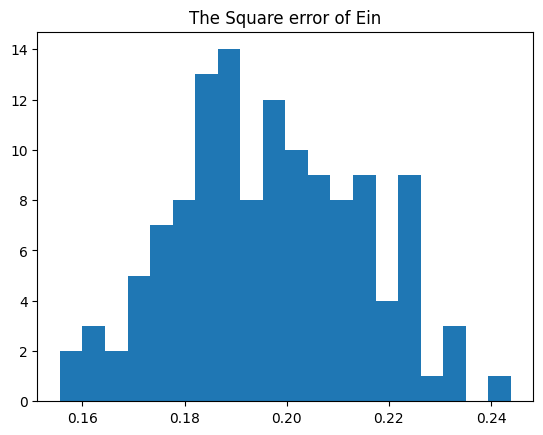

In [5]:
#problem 9
Ein_list_9 = []
for i in range(128):
    random.seed(i)
    xtrain, ytrain, xtest, ytest = generate()
    w = linear_reg(xtrain, ytrain)
    Ein_square = square_error(w, xtrain, ytrain,256)
    Ein_square = float(Ein_square)
    Ein_list_9.append(Ein_square)

print(f"The median of Ein Square Error is {np.median(Ein_list_9)}")
plt.hist(Ein_list_9,bins = 20)
plt.title("The Square error of Ein")
plt.show()

The median of Ein 0/1  is 0.0234375


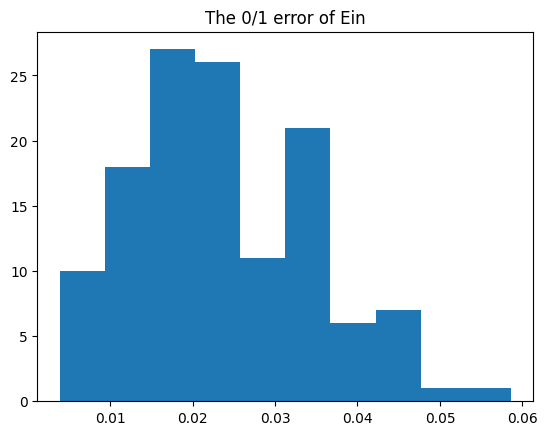

In [6]:
#problem 10
Ein_list_10 = []
for i in range(128):
    random.seed(i)
    xtrain, ytrain, xtest, ytest = generate()
    w = linear_reg(xtrain, ytrain)
    Ein_0_1 = error_0_1(w, xtrain, ytrain,256)
    Ein_0_1 = float(Ein_0_1)
    Ein_list_10.append(Ein_0_1)

print(f"The median of Ein 0/1  is {np.median(Ein_list_10)}")

plt.hist(Ein_list_10)
plt.title("The 0/1 error of Ein")
plt.show()

The median of Eout 0/1 linear  is 0.0238037109375
The median of Eout 0/1 logistic  is 0.03515625


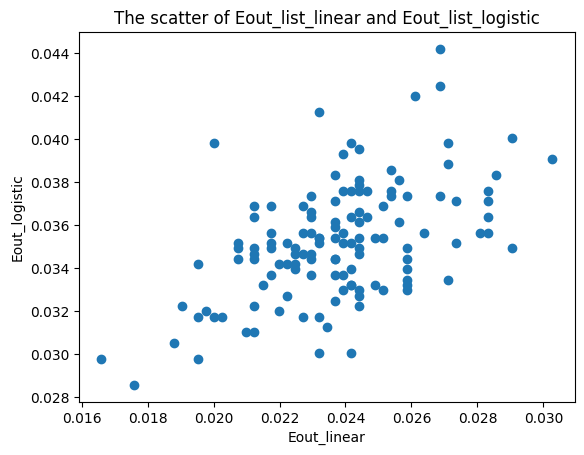

In [6]:
#problem 11
Eout_list_linear = []
Eout_list_logistic = []
for i in range(128):
    random.seed(i)
    xtrain, ytrain, xtest, ytest = generate()
    
    #linear
    w_linear = linear_reg(xtrain, ytrain)
    Eout_0_1_linear = error_0_1(w_linear, xtest, ytest,4096)
    Eout_0_1_linear = float(Eout_0_1_linear)
    Eout_list_linear.append(Eout_0_1_linear)
    
    #logistic
    w_logistic = logistic_reg(xtrain,ytrain,256)
    Eout_0_1_logistic = error_logistic(w_logistic, xtest, ytest, 4096)
    Eout_0_1_logistic = float(Eout_0_1_logistic)
    Eout_list_logistic.append(Eout_0_1_logistic)


print(f"The median of Eout 0/1 linear  is {np.median(Eout_list_linear)}")
print(f"The median of Eout 0/1 logistic  is {np.median(Eout_list_logistic)}")

plt.scatter(Eout_list_linear, Eout_list_logistic)
plt.title("The scatter of Eout_list_linear and Eout_list_logistic")
plt.xlabel("Eout_linear")
plt.ylabel("Eout_logistic")
plt.show()

The median of Eout 0/1 linear  is 0.02978515625
The median of Eout 0/1 logistic  is 0.03515625


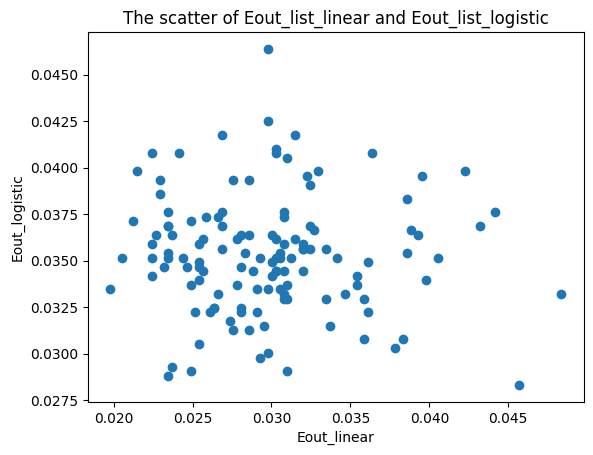

In [5]:
#problem 12
Eout_list_linear_12 = []
Eout_list_logistic_12 = []
for i in range(128):
    random.seed(i)
    xtrain, ytrain, xtest, ytest = generate_special()
    
    #linear
    w_linear = linear_reg(xtrain, ytrain)
    Eout_0_1_linear = error_0_1(w_linear, xtest, ytest,4096)
    Eout_0_1_linear  = float(Eout_0_1_linear )
    Eout_list_linear_12.append(Eout_0_1_linear)
    
    #logistic
    w_logistic = logistic_reg(xtrain,ytrain,272)
    Eout_0_1_logistic = error_logistic(w_logistic, xtest, ytest, 4096)
    Eout_0_1_logistic = float(Eout_0_1_logistic)
    Eout_list_logistic_12.append(Eout_0_1_logistic)


print(f"The median of Eout 0/1 linear  is {np.median(Eout_list_linear_12)}")
print(f"The median of Eout 0/1 logistic  is {np.median(Eout_list_logistic_12)}")

plt.scatter(Eout_list_linear_12, Eout_list_logistic_12)
plt.title("The scatter of Eout_list_linear and Eout_list_logistic")
plt.xlabel("Eout_linear")
plt.ylabel("Eout_logistic")
plt.show()

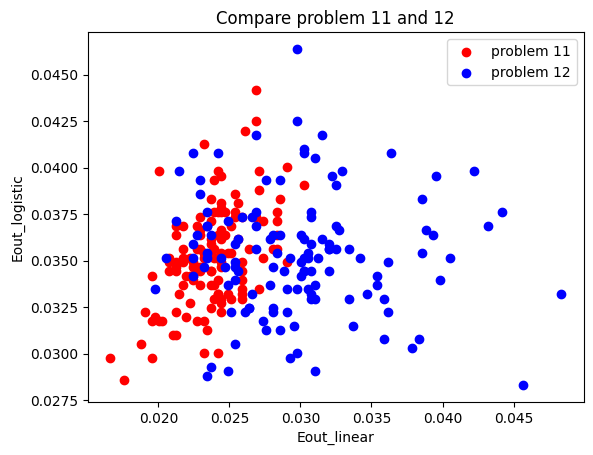

In [7]:
#compare problem 11 and 12
plt.scatter(Eout_list_linear, Eout_list_logistic, color = 'red')
plt.scatter(Eout_list_linear_12, Eout_list_logistic_12, color = 'blue')
plt.legend(["problem 11", "problem 12"])
plt.title("Compare problem 11 and 12")
plt.xlabel("Eout_linear")
plt.ylabel("Eout_logistic")
plt.show()